In [1]:
# DBScan demonstration on Spherical Data. 
# Compare the applications of Agglomerative, Kmeans, and DBScan clustering techniques



In [2]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv(r"DBSCAN\Dbscan_spherical_data.csv")
df

,x,y
0,-0.803739,-0.853053
1,0.852851,0.367618
2,0.927180,-0.274902
3,-0.752626,-0.511565
4,0.706846,0.810679
...,...,...
1095,0.956063,-2.473828
1096,0.930758,-2.366531
1097,0.989555,-2.475225
1098,0.979200,-2.637578


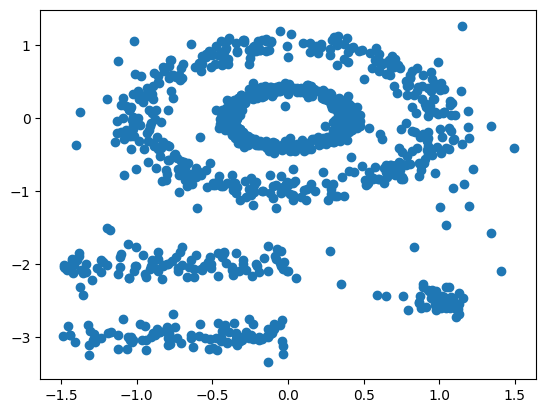

In [4]:
plt.scatter(df.x, df.y)
plt.show()



## Agglomerative Hierarchical Clustering

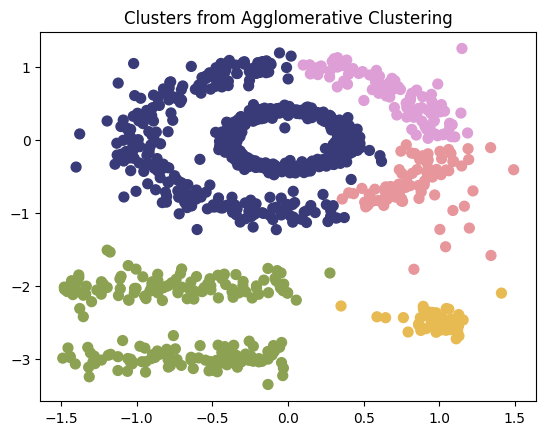

In [5]:
# Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(5, linkage = 'average')
ac_clusters = ac.fit_predict(df)
plt.figure(1)
plt.title("Clusters from Agglomerative Clustering")
plt.scatter(df.x, df.y, c = ac_clusters, s = 50, cmap = 'tab20b')
plt.show()



In [6]:
ac_clusters

array([0, 4, 3, ..., 2, 2, 2], dtype=int64)

## KMeans

C:\Users\Saurabh\Desktop\workspace\venv\tensflow210\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


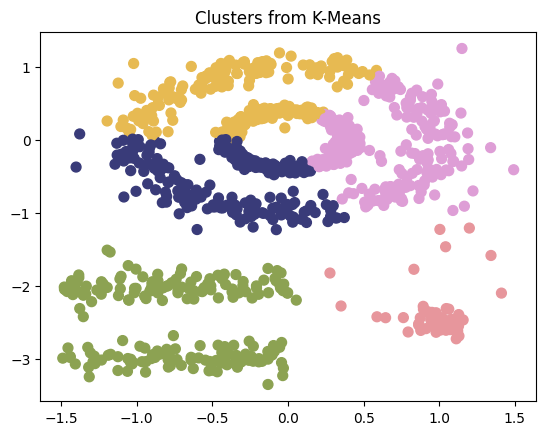

In [7]:

# KMeans
km = KMeans(5)
km_clusters = km.fit_predict(df)
plt.figure(2)
plt.title("Clusters from K-Means")
plt.scatter(df.x, df.y, c = km_clusters, s = 50, cmap = 'tab20b')
plt.show()



In [8]:
km_clusters

array([0, 4, 4, ..., 3, 3, 3])

## DBSCAN 

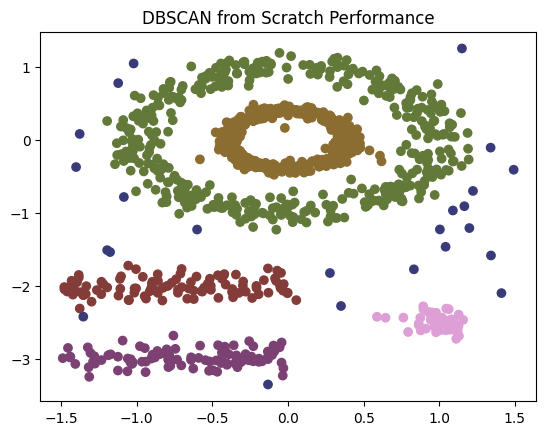

In [9]:

# DBSCAN 
db = DBSCAN(eps = 0.2, min_samples = 11).fit(df)
DBSCAN_clusters = db.labels_

plt.figure(3)
plt.scatter(df.x, df.y, c = DBSCAN_clusters, cmap = 'tab20b')
plt.title("DBSCAN from Scratch Performance")
plt.show()


In [10]:
DBSCAN_clusters

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [11]:
comp_column_labels = df.columns.tolist()+["AGNES", "KMean", "DBSCAN"]

In [12]:
clustering_comparison = df.copy()

In [13]:
clustering_comparison["AGNES"] = pd.Series(ac_clusters)
clustering_comparison["KMean"] = pd.Series(km_clusters)
clustering_comparison["DBSCAN"] = pd.Series(DBSCAN_clusters)

In [14]:
clustering_comparison

,x,y,AGNES,KMean,DBSCAN
0,-0.803739,-0.853053,0,0,0
1,0.852851,0.367618,4,4,0
2,0.927180,-0.274902,3,4,0
3,-0.752626,-0.511565,0,0,0
4,0.706846,0.810679,4,4,0
...,...,...,...,...,...
1095,0.956063,-2.473828,2,3,4
1096,0.930758,-2.366531,2,3,4
1097,0.989555,-2.475225,2,3,4
1098,0.979200,-2.637578,2,3,4
